# 투이워너비 6기 

## 스크래핑




In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
wiki_base = 'https://ko.wikipedia.org'

## 스크래핑할 웹페이지

In [3]:
base_url = 'https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EA%B3%B5%EA%B3%B5%EA%B8%B0%EA%B4%80_%EB%AA%A9%EB%A1%9D'


## 페이지 가져오기

In [4]:
base_page = requests.get(base_url)

## BeautifulSoup으로 불러오기

In [5]:
soup = BeautifulSoup(base_page.content, 'html.parser')

## 우리가 원하는 테크는 `<div role="navigation" class="navbox"...`

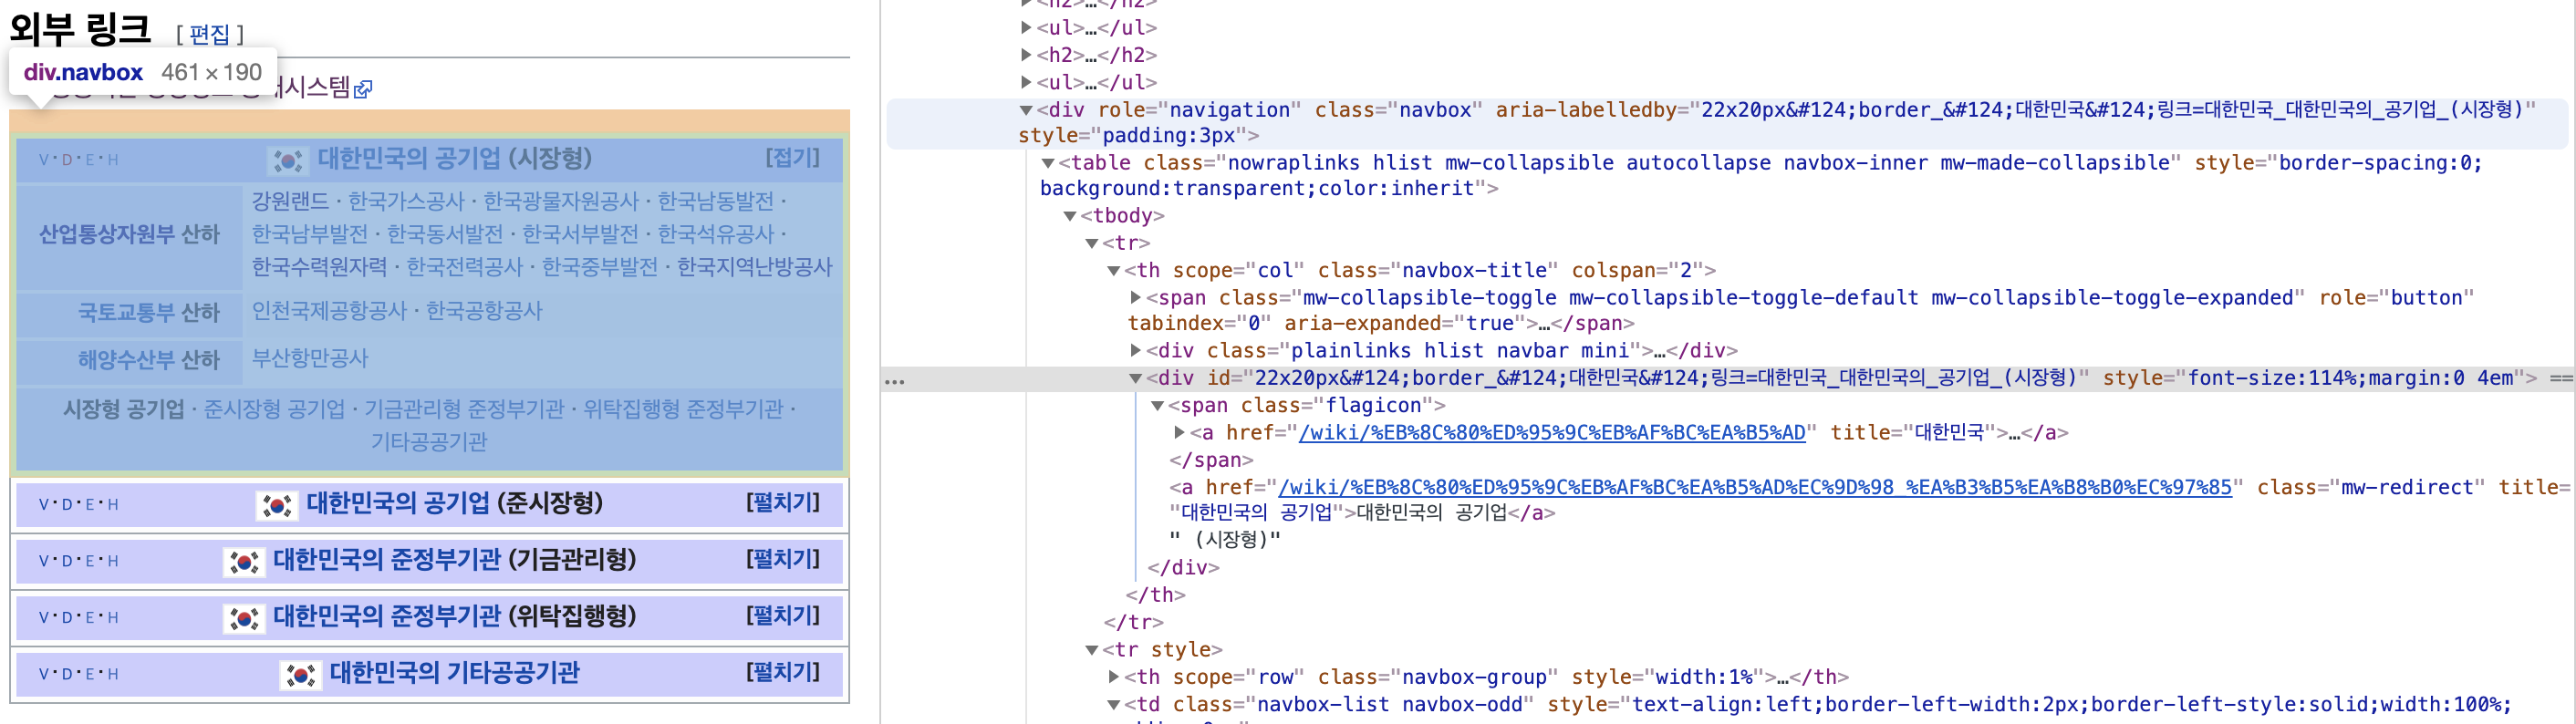

In [6]:
tables = soup.find_all('div', attrs = {'role': 'navigation', 
                                       'class':'navbox'})

## 각 테이블에서 `<td class="navbox-list"...` 안에 있는 `<li>`가 하나의 공공기관 항목에 해당함

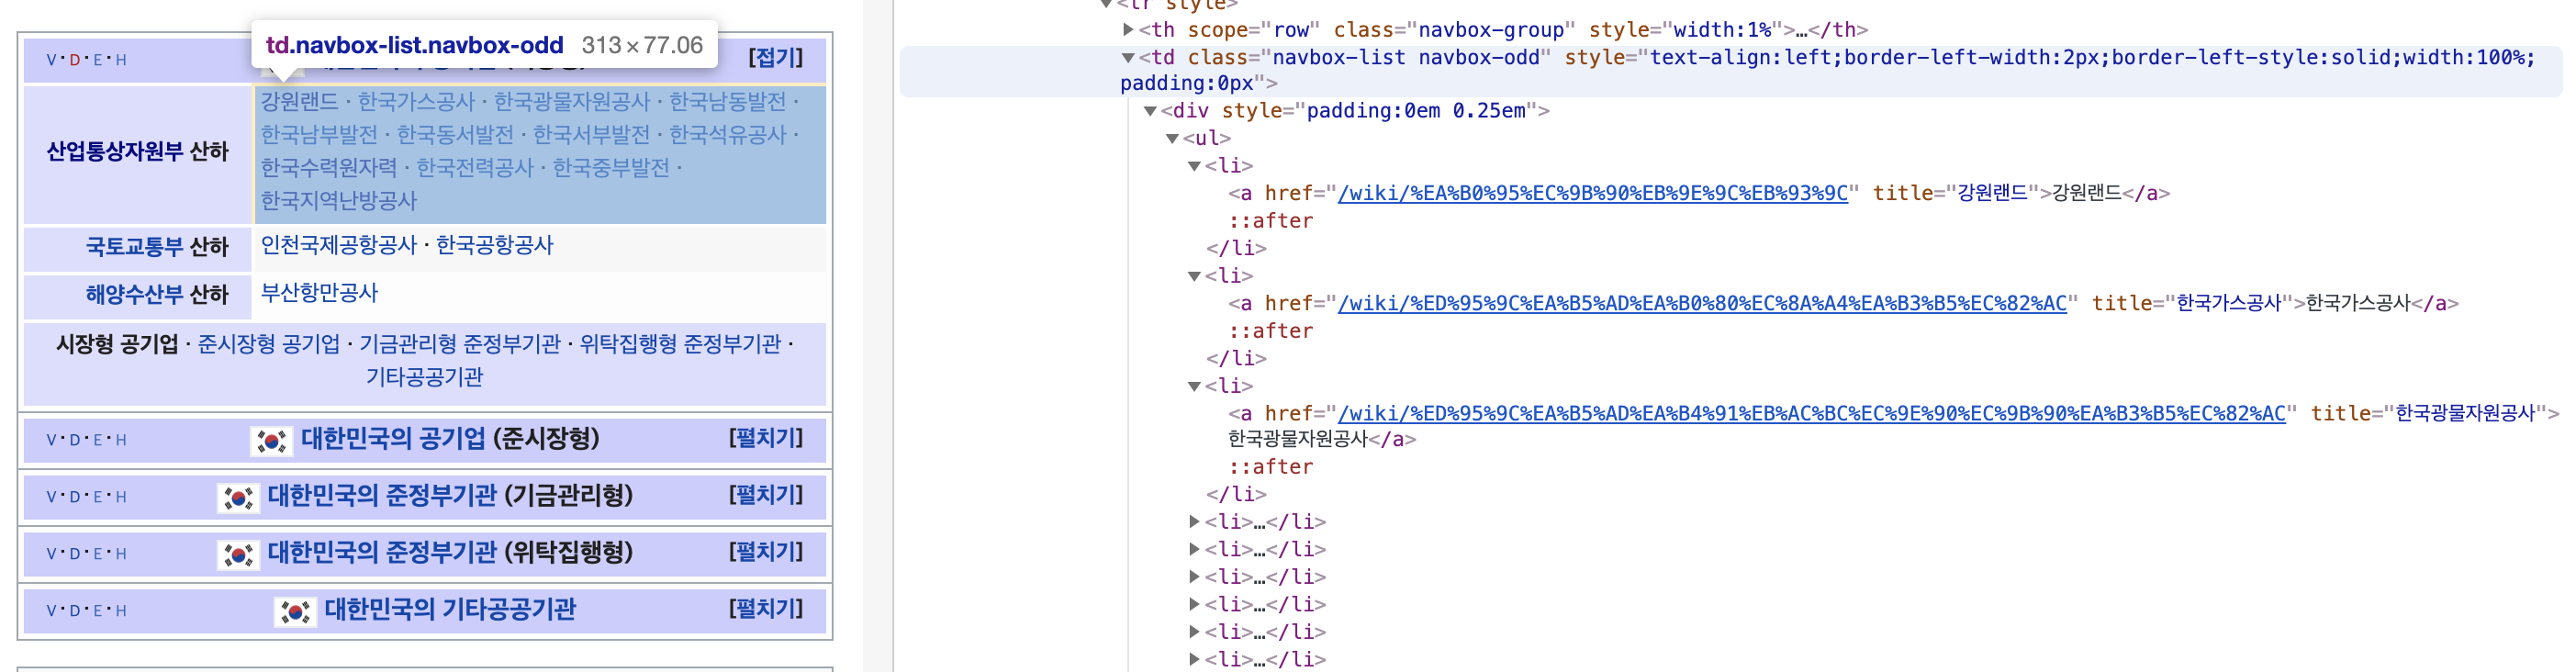

In [7]:
rows_list = []
for table in tables[0:5]:
    for cat in table.find_all('td', attrs = {'class':'navbox-list'}):
        for item in cat.find_all('li'):
            rows_list.append({'title': item.find('a')['title'],'url': wiki_base+ item.find('a')['href']})
            


## 스크래핑한 데이터를 테이블에 입력

In [8]:
df = pd.DataFrame(rows_list)
df.head()

,title,url
0,강원랜드,https://ko.wikipedia.org/wiki/%EA%B0%95%EC%9B%...
1,한국가스공사,https://ko.wikipedia.org/wiki/%ED%95%9C%EA%B5%...
2,한국광물자원공사,https://ko.wikipedia.org/wiki/%ED%95%9C%EA%B5%...
3,한국남동발전,https://ko.wikipedia.org/wiki/%ED%95%9C%EA%B5%...
4,한국남부발전,https://ko.wikipedia.org/wiki/%ED%95%9C%EA%B5%...


## 테이블을 엑셀 파일로 저장

In [9]:
df.to_excel('publics.xlsx')